In [1]:
import os
import numpy as np
train_path = './Mask_Image/Train/'
test_path = './Mask_Image/Test/'
val_path = './Mask_Image/Validation/'
# train_imgs_T = os.listdir(train_path+'WithMask/')
train_imgs_F = os.listdir(train_path+'WithoutMask/')
# test_imgs_T = os.listdir(test_path+'WithMask/')
test_imgs_F = os.listdir(test_path+'WithoutMask/')
# val_imgs_T = os.listdir(val_path+'WithMask/')
val_imgs_F = os.listdir(val_path+'WithoutMask/')
print('train : ',len(train_imgs_F))
print('test : ',len(test_imgs_F))
print('val : ',len(val_imgs_F))
# train_y = [1]*len(train_imgs_T) + [0]*len(train_imgs_F)
# test_y = [1]*len(test_imgs_T) + [0]*len(test_imgs_F)
# val_y = [1]*len(val_imgs_T) + [0]*len(val_imgs_F)
# print('train_y : ',np.unique(train_y,return_counts= True))
# print('test_y : ',np.unique(test_y,return_counts= True))
# print('val_y : ',np.unique(val_y,return_counts= True))

train :  5000
test :  509
val :  400


In [2]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np
img_size = 128

def pre_img(path):

    # 이미지 불러오기
    try:
        test_image=Image.open(path).resize((img_size,img_size))
    except:
        return None
    L_test_image = test_image.convert('L')
    test_image_arr=np.array(test_image).reshape(img_size,img_size,3)/255.0
    L_test_image_arr=np.array(L_test_image).reshape(img_size,img_size,1)/255.0
    
#     # 이미지 그래프로 그리기
#     plt.imshow(test_image)
#     plt.show()
#     plt.imshow(L_test_image, cmap = 'gray')
#     plt.show()

    return L_test_image_arr, test_image_arr

pre_img(train_path + 'WithoutMask/' +train_imgs_F[9])

(array([[[0.05882353],
         [0.06666667],
         [0.06666667],
         ...,
         [0.12156863],
         [0.09019608],
         [0.06666667]],
 
        [[0.06666667],
         [0.06666667],
         [0.06666667],
         ...,
         [0.09411765],
         [0.08627451],
         [0.0745098 ]],
 
        [[0.06666667],
         [0.06666667],
         [0.06666667],
         ...,
         [0.12156863],
         [0.11372549],
         [0.10196078]],
 
        ...,
 
        [[0.33333333],
         [0.3254902 ],
         [0.31372549],
         ...,
         [0.32156863],
         [0.40784314],
         [0.45882353]],
 
        [[0.31372549],
         [0.32941176],
         [0.30980392],
         ...,
         [0.32941176],
         [0.41568627],
         [0.47058824]],
 
        [[0.29019608],
         [0.30196078],
         [0.29019608],
         ...,
         [0.3254902 ],
         [0.41960784],
         [0.47843137]]]),
 array([[[0.0745098 , 0.05098039, 0.05098039],
        

In [3]:
train_x_path =[ train_path+'WithoutMask/' + name for name in train_imgs_F] 
val_x_path = [ val_path+'WithoutMask/' + name for name in val_imgs_F] 
test_x_path =[ test_path+'WithoutMask/' + name for name in test_imgs_F] 
len(train_x_path),len(val_x_path),len(test_x_path)

(5000, 400, 509)

In [4]:
from tqdm import tqdm
train_x_path = train_x_path + val_x_path
train_x = []
train_y = []
test_x = []
test_y = []
for path in tqdm(train_x_path):
    L_test_image_arr, test_image_arr = pre_img(path)
    train_x.append(L_test_image_arr)
    train_y.append(test_image_arr)
for path in tqdm(test_x_path):
    L_test_image_arr, test_image_arr = pre_img(path)
    test_x.append(L_test_image_arr)
    test_y.append(test_image_arr)

100%|███████████████████████████████████████████████████████████████████████████████| 509/509 [00:02<00:00, 215.97it/s]


In [5]:
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(5400, 128, 128, 1) (5400, 128, 128, 3)
(509, 128, 128, 1) (509, 128, 128, 3)


### 풀링,  샘플링 제외 모델

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 128, 128, 64)     18496     
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 128, 128, 3)      1731      
 ranspose)                                                       
                                                                 
Total params: 39,331
Trainable params: 39,331
Non-trainable params: 0
_________________________________________________________________


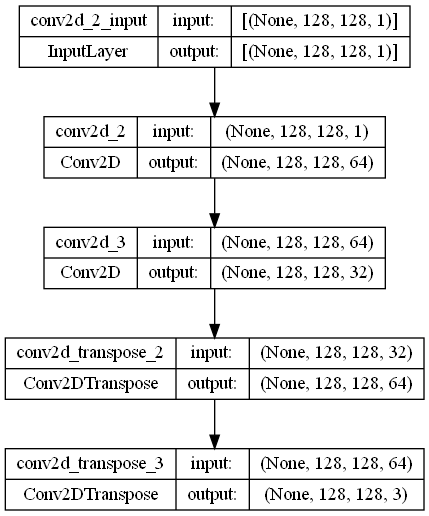

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Flatten, Dense, Reshape
from tensorflow.keras.utils import set_random_seed, plot_model

set_random_seed(493)

model2 = Sequential()

model2.add(Conv2D(
    64,
    3,
    padding = 'same',
    activation = 'relu',
    input_shape = (img_size,img_size,1)
))
model2.add(Conv2D(
    32,
    3,
    padding = 'same',
    activation = 'relu'
))

# 병목층
# model.add(Flatten())
# model.add(Dense(20,
#     activation = 'relu'
#                ))
# model.add(Reshape(32, 32, 64))

model2.add(Conv2DTranspose(
    64,
    3,
    padding = 'same',
    activation='relu'
))
# model2.add(Conv2DTranspose(
#     16,
#     3,
#     padding = 'same',
#     activation='relu'
# ))
model2.add(Conv2DTranspose(
    3,
    3,
    padding = 'same',
    activation='sigmoid'
))

model2.summary()
plot_model(model2, show_shapes=True)

In [10]:
model2.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics =  ['accuracy']
)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es_cb = EarlyStopping(monitor = 'val_loss', patience = 5)
mc_cb2 = ModelCheckpoint(monitor= 'val_loss', filepath = './color_model4.h5',save_best_only=False)

result2 =model2.fit(train_x, train_y,
              epochs = 10,
              callbacks=[es_cb, mc_cb2],
              validation_split= 0.2
             )

Epoch 1/10
135/135 [==============================] - 1178s 9s/step - loss: 0.5664 - accuracy: 0.9272 - val_loss: 0.5480 - val_accuracy: 0.9284
Epoch 2/10
135/135 [==============================] - 1154s 9s/step - loss: 0.5465 - accuracy: 0.9345 - val_loss: 0.5468 - val_accuracy: 0.9284
Epoch 3/10
135/135 [==============================] - 1152s 9s/step - loss: 0.5453 - accuracy: 0.9345 - val_loss: 0.5456 - val_accuracy: 0.9284
Epoch 4/10
135/135 [==============================] - 1158s 9s/step - loss: 0.5451 - accuracy: 0.9345 - val_loss: 0.5458 - val_accuracy: 0.9281
Epoch 5/10
135/135 [==============================] - 1174s 9s/step - loss: 0.5447 - accuracy: 0.9341 - val_loss: 0.5459 - val_accuracy: 0.9276
Epoch 6/10
135/135 [==============================] - 1155s 9s/step - loss: 0.5446 - accuracy: 0.9336 - val_loss: 0.5452 - val_accuracy: 0.9272
Epoch 7/10
135/135 [==============================] - 1150s 9s/step - loss: 0.5444 - accuracy: 0.9333 - val_loss: 0.5454 - val_accuracy:

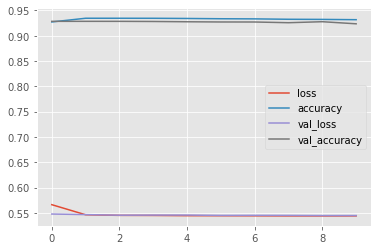

In [12]:

plt.style.use('ggplot')
for k in result2.history.keys():
    plt.plot(result2.epoch, result2.history[k], label = k)
    
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.models import load_model
plt.style.use('ggplot')
final_model2 = load_model('./color_model4.h5')
final_model2.evaluate(test_x, test_y)

16/16 [==============================] - 40s 2s/step - loss: 0.5477 - accuracy: 0.9276


[0.547674298286438, 0.9275795817375183]

1/1 [==============================] - 0s 484ms/step


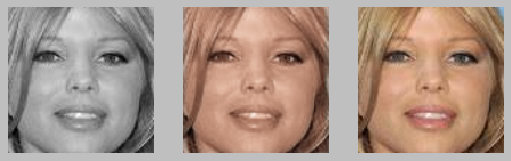




1/1 [==============================] - 0s 109ms/step


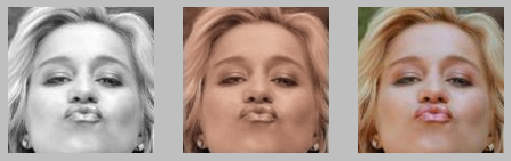




1/1 [==============================] - 0s 109ms/step


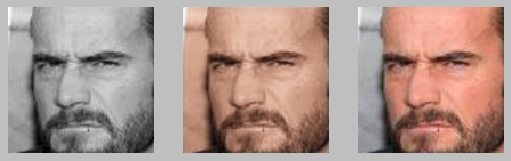




1/1 [==============================] - 0s 109ms/step


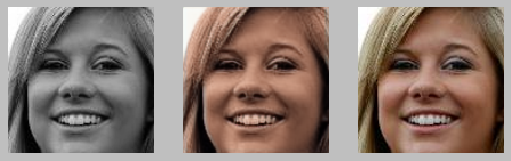




1/1 [==============================] - 0s 109ms/step


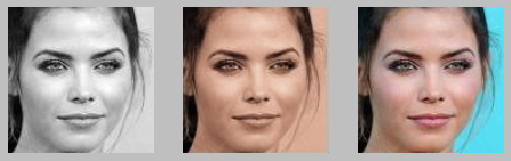

In [14]:
np.random.seed(493)
rand_nums = np.random.randint(0,len(test_x), 5)
plt.style.use('classic')


for num in rand_nums:
    plt.subplot(1,3,1)
    plt.matshow(test_x[num], cmap = 'gray', fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    pred2 = final_model2.predict(test_x[[num]])
    plt.matshow(pred2[0], fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.matshow(test_y[num], fignum=False)
    plt.axis('off')
    plt.show()
    print('\n\n')

1/1 [==============================] - 0s 122ms/step


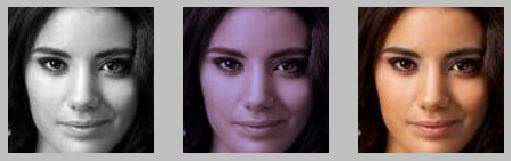




1/1 [==============================] - 0s 137ms/step


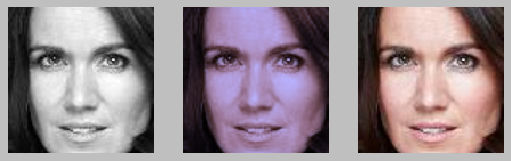




1/1 [==============================] - 0s 177ms/step


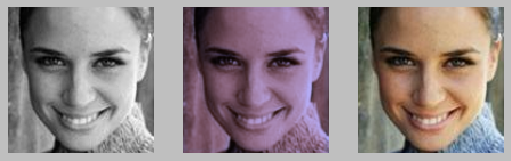




1/1 [==============================] - 0s 153ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


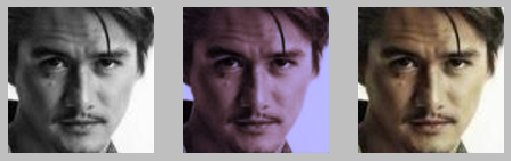




1/1 [==============================] - 0s 159ms/step


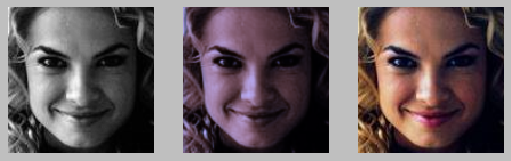




1/1 [==============================] - 0s 109ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


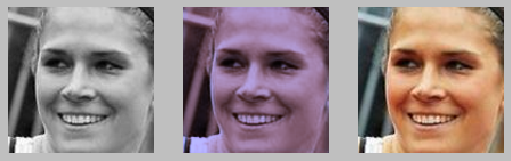




1/1 [==============================] - 0s 151ms/step


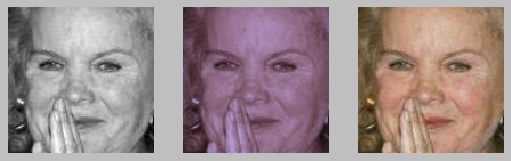




1/1 [==============================] - 0s 152ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


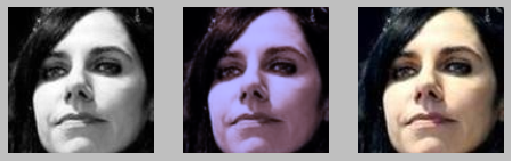




1/1 [==============================] - 0s 129ms/step


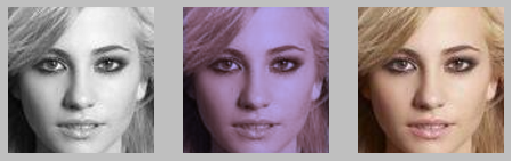




1/1 [==============================] - 0s 129ms/step


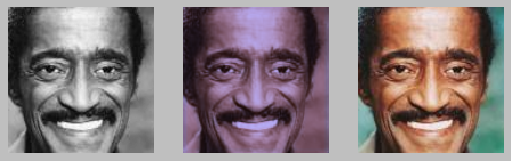

In [45]:

rand_nums = np.random.randint(0,len(test_x), 10)
plt.style.use('classic')

r, g, b = 2, 2, 3
w = np.sqrt(r**2+g**2+b**2)*0.65
for num in rand_nums:
    plt.subplot(1,3,1)
    plt.matshow(test_x[num], cmap = 'gray', fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    pred2 = final_model2.predict(test_x[[num]]) * [r, g, b]/ w
    plt.matshow(pred2[0], fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.matshow(test_y[num], fignum=False)
    plt.axis('off')
    plt.show()
    print('\n\n')

(128, 128, 1)
1/1 [==============================] - 0s 123ms/step


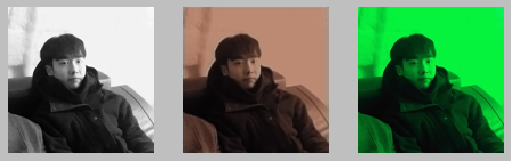




(128, 128, 1)
1/1 [==============================] - 0s 170ms/step


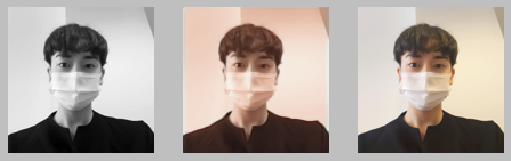

In [50]:
img_list = os.listdir('./final_test/')

plt.style.use('classic')

for i in range(len(img_list)):
    L_test_image_arr, test_image_arr =pre_img('./final_test/'+img_list[i])
    print(L_test_image_arr.shape)
    
    plt.subplot(1,3,1)
    plt.matshow(L_test_image_arr, cmap = 'gray', fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    pred2 = final_model2.predict(L_test_image_arr.reshape(-1,img_size,img_size,1))
    plt.matshow(pred2[0], fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.matshow(test_image_arr, fignum=False)
    plt.axis('off')
    plt.show()
    print('\n\n')

### 풀링, 업샘플링 포함 모델

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 32, 32, 64)      

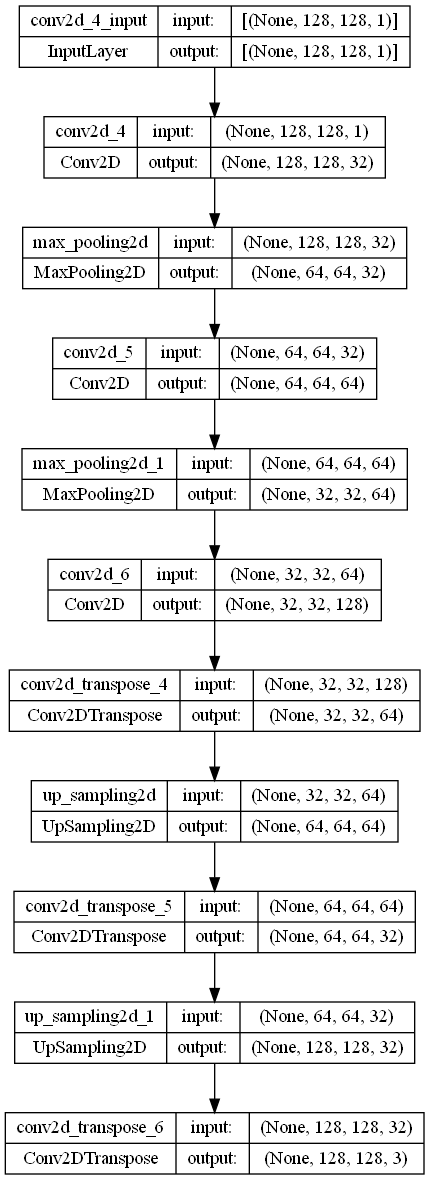

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.utils import set_random_seed, plot_model

set_random_seed(493)

model = Sequential()
model.add(Conv2D(
    32,
    3,
    padding = 'same',
    activation = 'relu',
    input_shape = (img_size,img_size,1)
))
model.add(MaxPooling2D())

model.add(Conv2D(
    64,
    3,
    padding = 'same',
    activation = 'relu',
))
model.add(MaxPooling2D())

model.add(Conv2D(
    128,
    3,
    padding = 'same',
    activation = 'relu'
))

# 병목층
# model.add(Flatten())
# model.add(Dense(20,
#     activation = 'relu'
#                ))
# model.add(Reshape(32, 32, 64))

model.add(Conv2DTranspose(
    64,
    3,
    padding = 'same',
    activation='relu'
))
model.add(UpSampling2D())
model.add(Conv2DTranspose(
    32,
    3,
    padding = 'same',
    activation='relu'
))
model.add(UpSampling2D())
model.add(Conv2DTranspose(
    3,
    3,
    padding = 'same',
    activation='sigmoid'
))

model.summary()
plot_model(model, show_shapes=True)

In [16]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics =  ['accuracy']
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es_cb = EarlyStopping(monitor = 'val_loss', patience = 5)
mc_cb = ModelCheckpoint(monitor= 'val_loss', filepath = './color_model3.h5',save_best_only=False)

result =model.fit(train_x, train_y,
              epochs = 10,
              callbacks=[es_cb, mc_cb],
              validation_split= 0.2
             )

Epoch 1/10
135/135 [==============================] - 567s 4s/step - loss: 0.5709 - accuracy: 0.9220 - val_loss: 0.5517 - val_accuracy: 0.9246
Epoch 2/10
135/135 [==============================] - 576s 4s/step - loss: 0.5495 - accuracy: 0.9341 - val_loss: 0.5508 - val_accuracy: 0.9278
Epoch 3/10
135/135 [==============================] - 560s 4s/step - loss: 0.5476 - accuracy: 0.9334 - val_loss: 0.5479 - val_accuracy: 0.9275
Epoch 4/10
135/135 [==============================] - 576s 4s/step - loss: 0.5476 - accuracy: 0.9331 - val_loss: 0.5476 - val_accuracy: 0.9275
Epoch 5/10
135/135 [==============================] - 565s 4s/step - loss: 0.5466 - accuracy: 0.9326 - val_loss: 0.5477 - val_accuracy: 0.9253
Epoch 6/10
135/135 [==============================] - 561s 4s/step - loss: 0.5463 - accuracy: 0.9320 - val_loss: 0.5470 - val_accuracy: 0.9256
Epoch 7/10
135/135 [==============================] - 563s 4s/step - loss: 0.5461 - accuracy: 0.9321 - val_loss: 0.5472 - val_accuracy: 0.9254

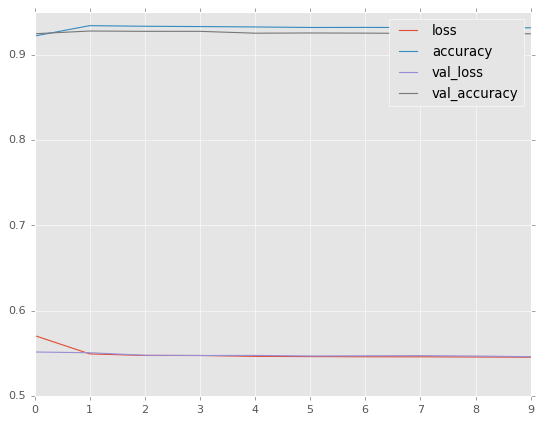

In [18]:
plt.style.use('ggplot')
for k in result.history.keys():
    plt.plot(result.epoch, result.history[k], label = k)
    
plt.legend()
plt.show()

In [19]:
from tensorflow.keras.models import load_model
final_model = load_model('./color_model3.h5')
final_model.evaluate(test_x, test_y)

16/16 [==============================] - 22s 1s/step - loss: 0.5488 - accuracy: 0.9279


[0.5488346815109253, 0.9278848767280579]

1/1 [==============================] - 0s 458ms/step


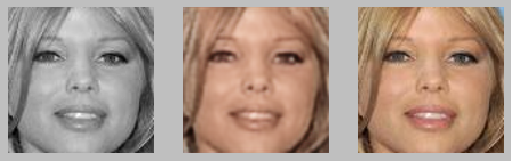




1/1 [==============================] - 0s 81ms/step


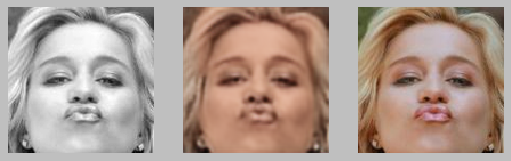




1/1 [==============================] - 0s 100ms/step


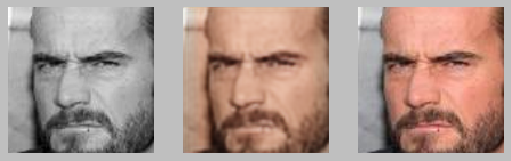




1/1 [==============================] - 0s 92ms/step


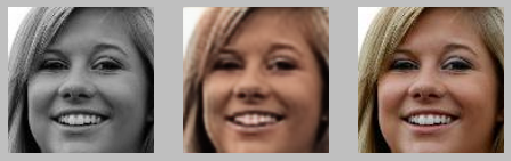




1/1 [==============================] - 0s 100ms/step


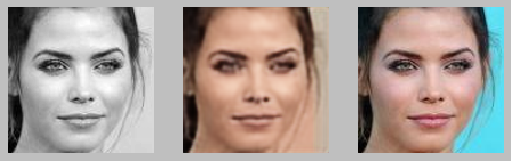

In [20]:
plt.style.use('classic')

rand_nums = np.random.randint(0,len(test_x), 5)
plt.style.use('classic')
for num in rand_nums:
    plt.subplot(1,3,1)
    plt.matshow(test_x[num], cmap = 'gray', fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    pred = final_model.predict(test_x[[num]])
    plt.matshow(pred[0], fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.matshow(test_y[num], fignum=False)
    plt.axis('off')
    plt.show()
    print('\n\n')

1/1 [==============================] - 0s 105ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


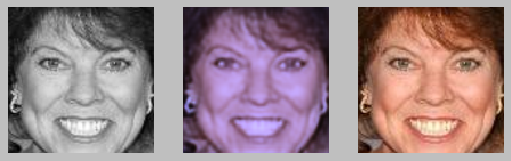




1/1 [==============================] - 0s 78ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


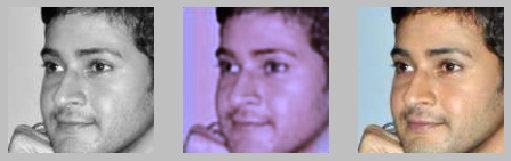




1/1 [==============================] - 0s 85ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


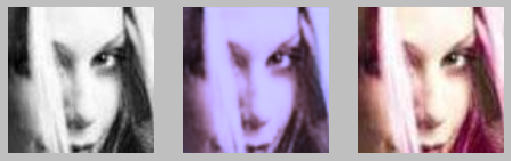




1/1 [==============================] - 0s 79ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


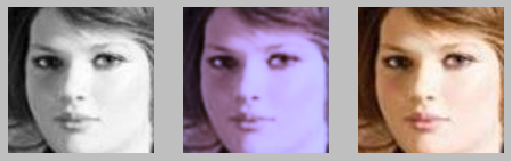




1/1 [==============================] - 0s 73ms/step


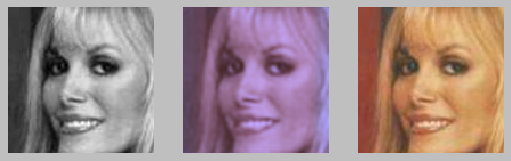




1/1 [==============================] - 0s 99ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


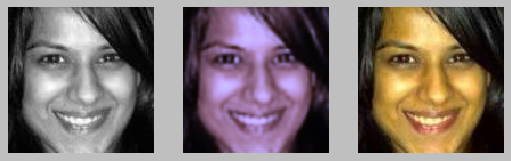




1/1 [==============================] - 0s 65ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


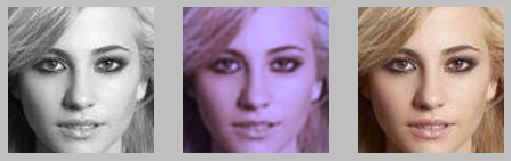




1/1 [==============================] - 0s 104ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


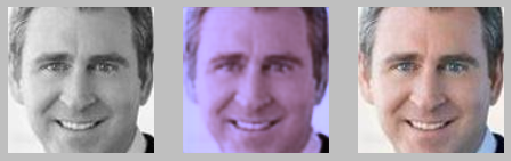




1/1 [==============================] - 0s 174ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


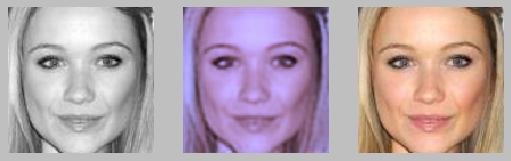




1/1 [==============================] - 0s 136ms/step


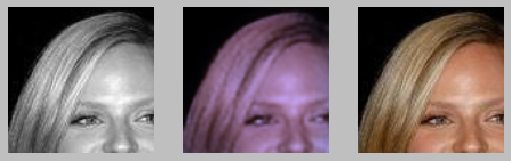

In [30]:
plt.style.use('classic')

rand_nums = np.random.randint(0,len(test_x), 10)
plt.style.use('classic')

r, g, b = 0.6, 0.6, 1
w = np.sqrt(r**2+g**2+b**2)

for num in rand_nums:
    plt.subplot(1,3,1)
    plt.matshow(test_x[num], cmap = 'gray', fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    pred = final_model.predict(test_x[[num]]) * [r, g, b]/ w * 1.8
    plt.matshow(pred[0], fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.matshow(test_y[num], fignum=False)
    plt.axis('off')
    plt.show()
    print('\n\n')

(128, 128, 1)
1/1 [==============================] - 0s 90ms/step


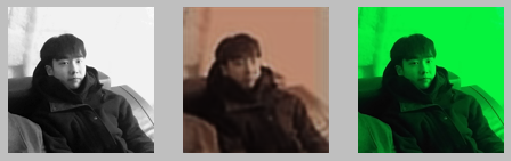




(128, 128, 1)
1/1 [==============================] - 0s 94ms/step


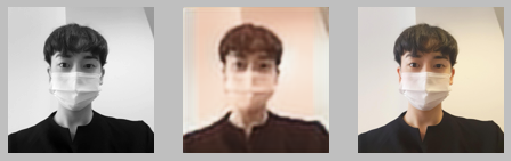

In [51]:
img_list = os.listdir('./final_test/')

plt.style.use('classic')

for i in range(len(img_list)):
    L_test_image_arr, test_image_arr =pre_img('./final_test/'+img_list[i])
    print(L_test_image_arr.shape)
    
    plt.subplot(1,3,1)
    plt.matshow(L_test_image_arr, cmap = 'gray', fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,2)
    pred = final_model.predict(L_test_image_arr.reshape(-1,img_size,img_size,1))
    plt.matshow(pred[0], fignum=False)
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.matshow(test_image_arr, fignum=False)
    plt.axis('off')
    plt.show()
    print('\n\n')